In [1]:
library(targets)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [132]:
tar_meta() %>% filter(!is.na(error)) %>% filter(str_detect(name, 'da_results_00_Ependymal_cells___obobFGF1BL6d14'))

name,type,data,command,depend,seed,path,time,size,bytes,format,repository,iteration,parent,children,seconds,warnings,error
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<list>,<dttm>,<chr>,<int64>,<chr>,<chr>,<chr>,<lgl>,<list>,<dbl>,<chr>,<chr>
da_results_00_Ependymal_cells___obobFGF1BL6d14,stem,error,4551f7112d8de1cc,fe3106a7ddd60c50,1608535143,NA,2024-01-12 01:14:58,de1c6d017cb4e8a8,38,qs,local,vector,NA,NA,0.341,NA,"The levels must by syntactically valid names in R, see helpmake.names. Nonvalid names batchBatch 2,batchBatch 3"


In [172]:
milo = qs::qread('_targets/objects/milo_Day14.Agrp')
milo

class: Milo 
dim: 17555 2196 
metadata(0):
assays(2): counts logcounts
rownames(17555): Xkr4 Gm1992 ... 4933409K07Rik AC149090.1
rowData names(0):
colnames(2196): SI-TT-A11_AAACCCAGTACGTTCA SI-TT-A11_AACAAGACAGCTAACT
  ... SI-TT-H11_TTGCATTCAGACCCGT SI-TT-H11_TTTAGTCCATCTCAAG
colData names(48): orig.ident nCount_RNA ... SCT_snn_res.0.8 ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(0):
nhoods dimensions(2): 2196 125
nhoodCounts dimensions(2): 125 18
nhoodDistances dimension(1): 125
graph names(1): graph
nhoodIndex names(1): 125
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 125 125

In [173]:
milo = qs::qread('../01_milo/_targets/objects/milo_Day14.Agrp')
milo

class: Milo 
dim: 19675 2282 
metadata(0):
assays(2): counts logcounts
rownames(19675): Lypla1 Tcea1 ... ENSMUSG00000095742 ENSMUSG00000095041
rowData names(0):
colnames(2282): CTCTGGTCAACCAACT_1_1 ACATTTCCACCTGTCT_1_1 ...
  CCTCCTCGTCCGGTGT_1_2 ATCCCTGAGCTTTGTG_5_2
colData names(38): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(0):
nhoods dimensions(2): 2282 143
nhoodCounts dimensions(2): 143 18
nhoodDistances dimension(1): 143
graph names(1): graph
nhoodIndex names(1): 143
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 143 143

In [168]:
make_milo = function(sce){
    milo_obj = miloR::Milo(sce) %>%
    .milo_buildGraph() %>%
    .milo_makeNhoods() %>%
    .milo_countCells() %>%
    .milo_calcNhoodDistance() %>%
    .milo_buildNhoodGraph()
    milo_obj
}


.milo_buildGraph = function(milo_obj, ...){
    milo_obj <- miloR::buildGraph(milo_obj, k=40, d=30, reduced.dim = 'PCA')
    milo_obj
}

.milo_makeNhoods = function(milo_obj){
    milo_obj <- miloR::makeNhoods(milo_obj, prop = 0.1, k= 20, d=30, refined = T, reduced_dims = 'PCA')
    milo_obj
}


.milo_countCells = function(milo_obj, sample='hash.mcl.ID'){
    milo_obj = miloR::countCells(milo_obj, meta.data = as.data.frame(SingleCellExperiment::colData(milo_obj)), sample = sample)
    milo_obj
}

.milo_calcNhoodDistance = function(milo_obj){
    milo_obj <- miloR::calcNhoodDistance(milo_obj, d=30, reduced.dim = 'PCA')
    milo_obj
}

.milo_buildNhoodGraph = function(milo_obj){
    milo_obj = miloR::buildNhoodGraph(milo_obj)
    milo_obj
}


In [169]:
milo = milo %>% make_milo
milo

Constructing kNN graph with k:40

Checking valid object

Running refined sampling with reduced_dim

Checking meta.data validity

Counting cells in neighbourhoods



class: Milo 
dim: 2000 4119 
metadata(0):
assays(1): logcounts
rownames(2000): Gm32647 Lingo2 ... Acadl Rbp2
rowData names(0):
colnames(4119): SI-TT-A11_AAACCCAGTACGTTCA SI-TT-A11_AAACGCTCACTATGTG
  ... SI-TT-H11_TTTAGTCCATCTCAAG SI-TT-H11_TTTGATCAGTACTCGT
colData names(45): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: integrated
altExpNames(0):
nhoods dimensions(2): 4119 241
nhoodCounts dimensions(2): 241 18
nhoodDistances dimension(1): 241
graph names(1): graph
nhoodIndex names(1): 241
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 241 241

In [6]:
meta = targets::tar_meta()

In [7]:
failed_obj = meta %>% 
filter(str_detect(name, '^obj_')) %>% 
filter(!is.na(error)) %>%
pull(name) %>% unique %>% str_replace('^obj_', '')
failed_obj

character(0)

In [157]:
failed_obj = meta %>% 
filter(str_detect(name, '^milo_')) %>% 
filter(!str_detect(name, '.*index_tibble*.')) %>% 
filter(!is.na(error)) %>%
pull(name) %>% unique %>% str_replace('^milo_', '')
failed_obj

[1] "Day14.Endothelial_cells" "Day14.g5"               
 [3] "Day14.g6"                "Day14.g7"               
 [5] "Day14.Pericytes"         "Day14.VLMC"             
 [7] "Day5.Endothelial_cells"  "Day5.g5"                
 [9] "Day5.g6"                 "Day5.g7"                
[11] "Day5.Pericytes"          "Endothelial_cells"      
[13] "g7"

In [158]:
failed_obj = meta %>% 
filter(str_detect(name, '^design_df_')) %>% 
filter(!is.na(error)) %>%
pull(name) %>% unique %>% str_replace('^design_df_', '')
failed_obj

[1] "Day14.Endothelial_cells" "Day14.g5"               
 [3] "Day14.g6"                "Day14.g7"               
 [5] "Day14.Pericytes"         "Day14.VLMC"             
 [7] "Day5.Endothelial_cells"  "Day5.g5"                
 [9] "Day5.g6"                 "Day5.g7"                
[11] "Day5.Pericytes"          "Endothelial_cells"      
[13] "g7"

In [ ]:
failed_obj = meta %>% 
filter(str_detect(name, '^milo_')) %>% 
filter(!str_detect(name, '.*index_tibble*.')) %>% 
filter(!is.na(error)) %>%
pull(name) %>% unique %>% str_replace('^milo_', '')
failed_obj

In [135]:
obj = qs::qread('_targets/objects/obj_Ependymal_cells')
obj

An object of class Seurat 
22966 features across 678 samples within 2 assays 
Active assay: SCT (11483 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [139]:
obj %>% prep_obj_for_milo_cb_v01(set_orig.batch=FALSE) %>% `[[` %>% distinct(batch)

,batch
,<chr>
SI-TT-A11_AAGACAAAGCGACTTT,Batch__1
SI-TT-A12_AAAGAACCAAGACGAC,Batch__3
SI-TT-C11_AATGGCTCAATCGCCG,Batch__2


In [3]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [5]:
obj = qs::qread('_targets/objects/exp_labelled_other')
obj

An object of class Seurat 
25126 features across 32123 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [160]:
source("../00_preprocessing/splitwrapper.R")
source(paste0("../00_preprocessing/preprocessing.R"))
source(paste0("../01_milo/milo.R"))
source(paste0("../01_milo/milo_plotting.R"))
source(paste0("../00_cellbender/cellbender_preprocess.R"))
source("../00_cellbender/process_seurat.R")
source('milo_cellbender.R')

In [7]:
obj %>% prep_obj_for_milo_cb_v01

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `labels = stringr::str_replace_all(labels,
  stringr::fixed("-"), "__")`.
[1mCaused by error in `stri_replace_all_fixed()`:[22m
[33m![39m argument `str` should be a character vector (or an object coercible to)


In [16]:
set_orig.batch = TRUE
obj = obj %>% set_labels_to_labels_chunk
obj@meta.data = obj@meta.data %>% mutate(hash.mcl.ID = hash.mcl.ID_SCOP)
    if (set_orig.batch){
        obj@meta.data = obj@meta.data %>% mutate(orig.batch = batch)
    }
    obj@meta.data = obj@meta.data %>% mutate(batch = stringr::str_replace_all(batch, stringr::fixed(" "), '__'))
    obj@meta.data = obj@meta.data %>% 
        mutate(labels = stringr::str_replace_all(labels, stringr::fixed("-"), '__')) %>%
        mutate(labels = stringr::str_replace_all(labels, stringr::fixed("/"), '__')) %>%
        mutate(labels = stringr::str_replace_all(labels, stringr::fixed("("), '__')) %>%
        mutate(labels = stringr::str_replace_all(labels, stringr::fixed(")"), '__'))
    obj@meta.data$group = interaction(obj@meta.data$treatment, 
                                      obj@meta.data$time, 
                                      obj@meta.data$strain, 
                                      drop = TRUE)
#     obj

In [17]:
obj %>% `[[` %>% head

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_SCOP,nFeature_RNA_SCOP,Index.10x_SCOP,nCount_HTO_SCOP,nFeature_HTO_SCOP,Index.HTO_SCOP,nCount_spliced_SCOP,⋯,integrated_snn_res.0.5,seurat_clusters,class,integrated_snn_res.0.8,labels_lvl1,labels_chunk,hash.mcl.ID,orig.batch,labels,group
,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,⋯,<chr>,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
SI-TT-A11_AAACCCAGTATCGGTT,SI-TT-A11,1529,1172,4761,2296,SI-TT-A11,1150,12,D706,944,⋯,2,6,other,6,Tanycytes,g1,M18,Batch__1,g1,Veh_PF.Day14.BL6
SI-TT-A11_AAACGAAAGCAACAAT,SI-TT-A11,1064,740,2640,1296,SI-TT-A11,797,12,D706,604,⋯,20,5,other,5,Oligodendrocytes,g3,M24,Batch__1,g3,Veh_PF.Day14.obob
SI-TT-A11_AAACGAAAGGTTCTTG,SI-TT-A11,1931,1259,7617,2701,SI-TT-A11,788,12,D706,1178,⋯,21,13,other,13,OPC,g3,M8,Batch__1,g3,Veh_PF.Day5.obob
SI-TT-A11_AAACGAACAAGGAGTC,SI-TT-A11,4798,2304,12026,3374,SI-TT-A11,1753,12,D706,2248,⋯,0,7,other,7,Astrocytes,g2,J11,Batch__1,g2,FGF1.Day14.obob
SI-TT-A11_AAACGAACAGCCTTCT,SI-TT-A11,2783,1648,8725,2985,SI-TT-A11,1667,12,D706,1694,⋯,0,2,other,2,Astrocytes,g2,J2,Batch__1,g2,Veh_PF.Day14.obob
SI-TT-A11_AAACGCTAGTGCTAGG,SI-TT-A11,1243,937,3580,1882,SI-TT-A11,991,12,D706,774,⋯,2,11,other,11,Tanycytes,g1,M2,Batch__1,g1,Veh_PF.Day5.BL6


In [141]:
obj = qs::qread('_targets/objects/exp_labelled_other')%>%
set_labels_to_lvl1 %>%
             prep_obj_for_milo_cb_v01 %>%
             set_batch_to_lane %>% # do not set batch to lane for cluster splits, will error on design or model matrix. reset later
             prep_obj_for_milo_cb_v01(set_orig.batch = FALSE) %>%
             subset_exp_by_time('all') %>%
             single_split('Ependymal_cells') %>%
             reset_orig.batch

In [142]:
obj %>% prep_obj_for_milo_cb_v01(set_orig.batch=FALSE) %>% `[[` %>% distinct(batch)

,batch
,<chr>
SI-TT-A11_AAGACAAAGCGACTTT,Batch__1
SI-TT-A12_AAAGAACCAAGACGAC,Batch__3
SI-TT-C11_AATGGCTCAATCGCCG,Batch__2


In [146]:
qs::qread('_targets/objects/obj_Day14.Sst__Pthlh') %>% prep_obj_for_milo_cb_v01 %>% `[[` %>% distinct(batch)

,batch
,<chr>
SI-TT-A11_AAACCCAAGGTGGTTG,Batch__1
SI-TT-A12_AAGACAAGTTCAATCG,Batch__3
SI-TT-C11_AAAGTGAAGTTCTACG,Batch__2


In [59]:
obj = qs::qread('_targets/objects/exp_labelled_other') %>%
set_labels_to_lvl1 %>%
 prep_obj_for_milo_cb_v01 %>%
 set_batch_to_lane %>%
 prep_obj_for_milo_cb_v01(set_orig.batch = FALSE) %>%
 subset_exp_by_time('all') %>%
 single_split('Astrocytes') %>%
 reconsitute_rna_seurat %>%
 Seurat::SCTransform(assay='RNA', ncells = 5000, variable.features.n = 3000,
                        method="glmGamPoi",
                        vars.to.regress="Index.10x_SCOP",
                        vst.flavor="v2",
                        verbose=TRUE) %>%
 run_sct_chaser

obj

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 19054 by 14378

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 509 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19054 genes

Computing corrected count matrix for 19054 genes

Calculating gene attributes

Wall clock passed: Time difference of 3.114056 mins

Determine variable features

Regressing out Index.10x_SCOP

Centering data matrix

Getting residuals for block 1(of 3) for counts dataset

Getting residuals for block 2(of 3) for counts dataset

Getting residuals for block 3(of 3) for counts dataset

Centering data matrix

Finished calculating residuals for counts

Set default assay to SCT

23:52:29 UMAP embedding parameters a =

An object of class Seurat 
38108 features across 14378 samples within 2 assays 
Active assay: SCT (19054 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

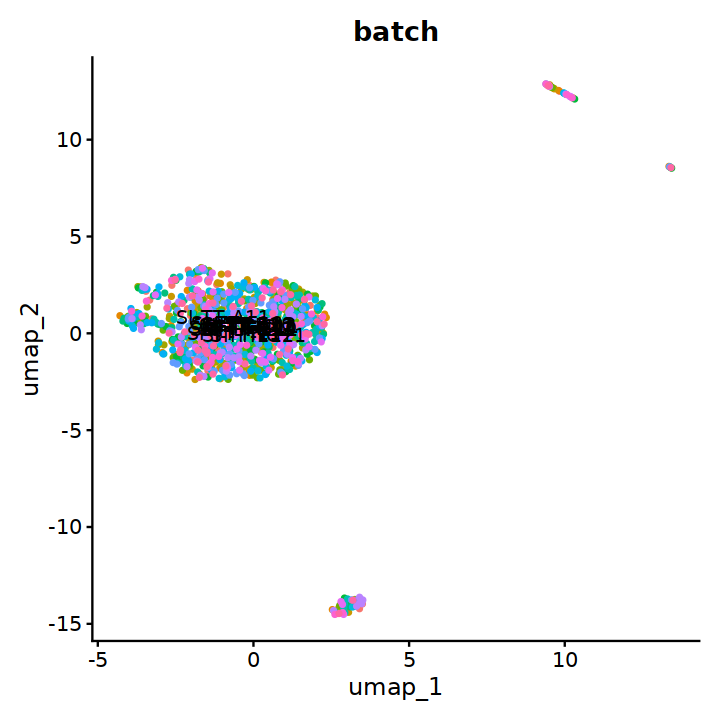

In [114]:
obj = qs::qread('_targets/objects/obj_Microglia')
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=T) + NoLegend()

In [115]:
obj

An object of class Seurat 
22244 features across 1024 samples within 2 assays 
Active assay: SCT (11122 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

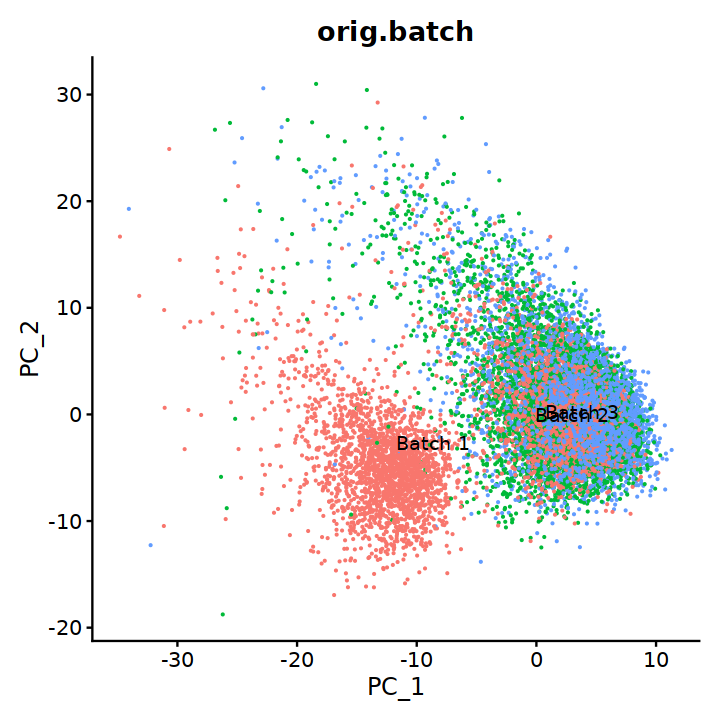

In [63]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "pca", group.by='orig.batch', label=T) + NoLegend()

In [33]:
batch = "Index.10x_SCOP"

In [36]:
obj[[batch]] %>% group_by %>% summarise(n=n())

n
<int>
3039


In [26]:
obj %>% `[[` %>%
group_by(Index.10x_SCOP) %>%
summarise(n = n())

Index.10x_SCOP,n
<chr>,<int>
SI-TT-A11,23
SI-TT-A12,21
SI-TT-B12,20
SI-TT-C11,45
SI-TT-C12,32
SI-TT-D11,31
SI-TT-E10,20
SI-TT-E11,47
SI-TT-E12,21


In [48]:
obj %>% `[[` %>%
group_by(eval(batch)) %>%
summarise(n = n())

eval(batch),n
<chr>,<int>
Batch__1,195
Batch__2,169
Batch__3,217


An object of class Seurat 
10007 features across 443 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 8007 by 443

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 443 cells

Found 139 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8007 genes

Computing corrected count matrix for 8007 genes

Calculating gene attributes

Wall clock passed: Time difference of 12.00482 secs

Determine variable features

Regressing out Index.10x_SCOP

Centering data matrix

Set default assay to SCT

00:03:36 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

00:03:36 Read 443 rows and found 30 numeric columns

00:03:36 Using Annoy for neighbor search, n_neighbors

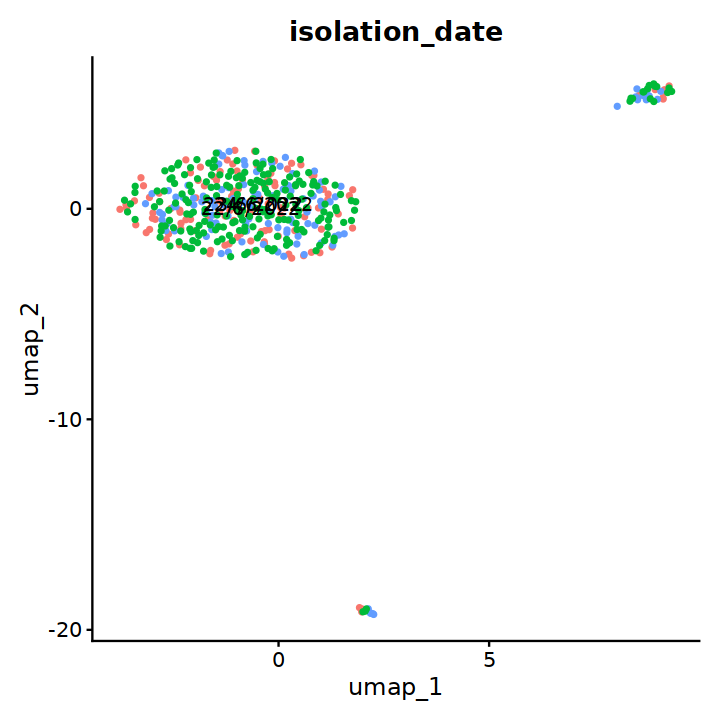

In [71]:
obj = qs::qread('_targets/objects/obj_Day14.Microglia')
obj
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj %>% Seurat::SCTransform(assay='RNA', ncells = 5000, variable.features.n = 3000,
                        method="glmGamPoi",
                        vars.to.regress="Index.10x_SCOP",
                        vst.flavor="v2",
                        verbose=TRUE) %>%
 run_sct_chaser, reduction = "umap", group.by='isolation_date', label=T) + NoLegend()

In [96]:
obj = qs::qread('_targets/objects/milo_Day5.Astrocytes')
obj
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='Index.10x_SCOP', label=T) + NoLegend()

Loading required package: miloR

Loading required package: edgeR

Loading required package: limma



class: Milo 
dim: 17053 6863 
metadata(0):
assays(2): counts logcounts
rownames(17053): Xkr4 Gm1992 ... Tmlhe AC149090.1
rowData names(0):
colnames(6863): SI-TT-A11_AAAGTCCCAAATAAGC SI-TT-A11_AAAGTCCGTGGTCTTA
  ... SI-TT-H11_TTTGGAGGTTCATCGA SI-TT-H11_TTTGGTTCACCAACAT
colData names(44): orig.ident nCount_RNA ... SCT_snn_res.0.8 ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(0):
nhoods dimensions(2): 6863 417
nhoodCounts dimensions(2): 417 18
nhoodDistances dimension(1): 417
graph names(1): graph
nhoodIndex names(1): 417
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 417 417

ERROR: Error in UseMethod(generic = "FetchData", object = object): no applicable method for 'FetchData' applied to an object of class "c('Milo', 'SingleCellExperiment', 'RangedSummarizedExperiment', 'SummarizedExperiment', 'RectangularData', 'Vector', 'Annotated', 'vector_OR_Vector')"


In [106]:
qs::qread('_targets/objects/design_df_Day14.n9')

,hash.mcl.ID,group,strain,isolation_date,batch
,<chr>,<fct>,<chr>,<chr>,<fct>
M18,M18,Veh_PF.Day14.BL6,BL6,22/6/2022,X22.6.2022
M24,M24,Veh_PF.Day14.obob,obob,22/6/2022,X22.6.2022
J2,J2,Veh_PF.Day14.obob,obob,22/6/2022,X22.6.2022
M13,M13,FGF1.Day14.obob,obob,22/6/2022,X22.6.2022
M17,M17,Veh_PF.Day14.BL6,BL6,22/6/2022,X22.6.2022
J11,J11,FGF1.Day14.obob,obob,22/6/2022,X22.6.2022
J18,J18,FGF1.Day14.obob,obob,24/6/2022,X24.6.2022
M28,M28,FGF1.Day14.obob,obob,24/6/2022,X24.6.2022
M20,M20,Veh_PF.Day14.BL6,BL6,24/6/2022,X24.6.2022


In [116]:
tar_meta() %>% filter(!is.na(error)) %>% filter(str_detect(name, 'mm_Pomc__Ttr'))

name,type,data,command,depend,seed,path,time,size,bytes,format,repository,iteration,parent,children,seconds,warnings,error
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<list>,<dttm>,<chr>,<int64>,<chr>,<chr>,<chr>,<lgl>,<list>,<dbl>,<chr>,<chr>
mm_Pomc__Ttr,stem,error,1eefd5f8be555507,cd9b71eb879530a5,-131471121,NA,2024-01-12 00:55:11,de1c6d017cb4e8a8,38,qs,local,vector,NA,NA,0.004,NA,object group not found


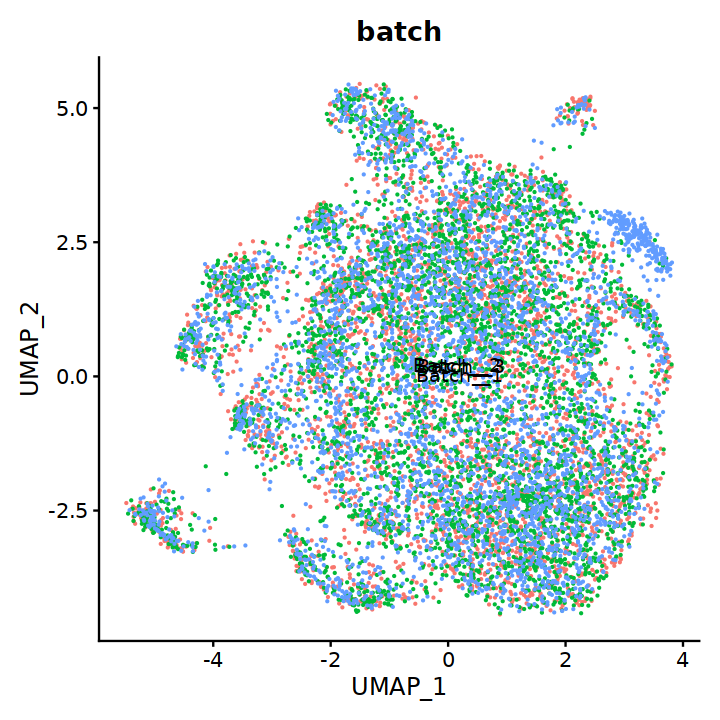

In [110]:
obj = qs::qread('../01_milo/_targets/objects/obj_Astrocytes')
DimPlot(obj, reduction = "umap", group.by='batch', label=T) + NoLegend()

In [111]:
qs::qread('../01_milo/_targets/objects/milo_Astrocytes')

class: Milo 
dim: 21225 11238 
metadata(0):
assays(2): counts logcounts
rownames(21225): Lypla1 Tcea1 ... ENSMUSG00000095742 ENSMUSG00000095041
rowData names(0):
colnames(11238): GTTGTCCCATCGGCCA_1_1 GATGTTGCACCGTCGA_1_1 ...
  TCGTGGGGTTTGAAAG_5_3 AAACCCAGTCGTTCAA_5_3
colData names(36): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(0):
nhoods dimensions(2): 11238 636
nhoodCounts dimensions(2): 636 36
nhoodDistances dimension(1): 636
graph names(1): graph
nhoodIndex names(1): 636
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 636 636

In [126]:
obj = qs::qread('_targets/objects/obj_Ependymal_cells')
obj

An object of class Seurat 
22966 features across 678 samples within 2 assays 
Active assay: SCT (11483 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [130]:
obj %>% `[[` %>% distinct(orig.batch)

,orig.batch
,<chr>
SI-TT-A11_AAGACAAAGCGACTTT,SI-TT-A11
SI-TT-A12_AAAGAACCAAGACGAC,SI-TT-A12
SI-TT-B12_AACCATGCACGTGAGA,SI-TT-B12
SI-TT-C11_AATGGCTCAATCGCCG,SI-TT-C11
SI-TT-C12_AAAGGATGTGCCGGTT,SI-TT-C12
SI-TT-D11_AAAGTGATCGTGTTCC,SI-TT-D11
SI-TT-E10_AAGCATCTCCTGGGAC,SI-TT-E10
SI-TT-E11_AACACACGTGTGAGCA,SI-TT-E11
SI-TT-E12_AAAGTCCTCGTTGTGA,SI-TT-E12


Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 8761 by 581

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 581 cells

Found 147 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8761 genes

Computing corrected count matrix for 8761 genes

Calculating gene attributes

Wall clock passed: Time difference of 12.54459 secs

Determine variable features

Regressing out Index.10x_SCOP

Centering data matrix

Set default assay to SCT

23:24:34 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

23:24:34 Read 581 rows and found 30 numeric columns

23:24:34 Using Annoy for neighbor search, n_neighbors

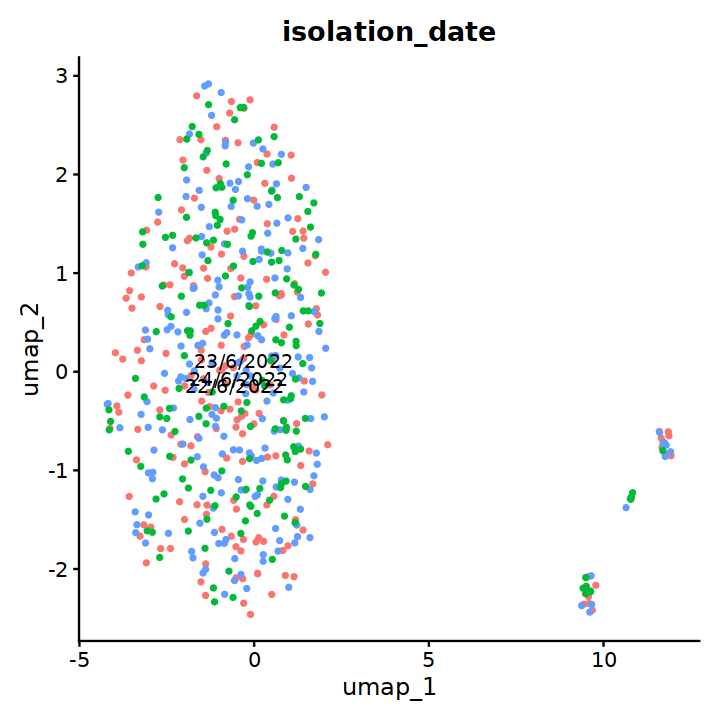

In [50]:
obj = obj %>% 
 Seurat::SCTransform(assay='RNA',
                        method="glmGamPoi",
                        vars.to.regress="Index.10x_SCOP",
                        vst.flavor="v2",
                        verbose=TRUE)  %>% run_sct_chaser
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='isolation_date', label=T) + NoLegend()

In [ ]:
obj = obj %>% 
 Seurat::SCTransform(assay='RNA',
                        method="glmGamPoi",
                        vars.to.regress="Index.10x_SCOP",
                        vst.flavor="v2",
                        verbose=TRUE)  %>% run_sct_chaser
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='isolation_date', label=T) + NoLegend()

In [45]:
obj@commands

$FindIntegrationAnchors
Command: FindIntegrationAnchors(object.list = list, reference = ref_datasets,     k.anchor = k.anchor, anchor.features = features, reduction = "rpca")
Time: 2024-01-11 22:29:43
assay : RNA RNA RNA 
anchor.features : Nrxn1 Trpm3 Wdr17 Lsamp Npas3 Gpc5 Slit2 Nnat Pcdh9 Adgrb3 Slc4a4 Rora Cadm2 Magi2 Mdga2 Kcnd2 Gm20713 Lrrc4c Nlgn1 Ntrk2 Lrp1b Col23a1 Rmst Efna5 Ntm B3galt1 Agbl4 Pde4b Prex2 Gm3764 Slc1a2 Fgf14 Gabrb1 Sorbs2os Fry Ptprd Dgkb Nebl Plcb1 Ank2 Erbb4 Gria1 Adgrl3 Nrcam Il1rapl1 Dtna Msi2 Ptprt Tmtc2 Arhgap15 Ncam2 Plce1 Spon1 Ctnnd2 Sik3 Gpc6 Zfpm2 Phlpp1 Sorbs2 Gm48747 Sox5 Sparcl1 Rgs20 Itih3 Luzp2 Pbx1 B230323A14Rik Grid2 Ppp2r2b Rorb Atp1a2 Gsdme Slc7a11 Mrc1 Pacrg Mgat4c Cdh20 Nhsl1 Tnik Kirrel3 Rgs6 Ttyh1 Fbxl7 Rad51b Ptprz1 Mapk4 Antxr1 Kcnn2 Mir100hg Kif1b 6330403K07Rik Auts2 Ccdc85a Lhfp Nfib Fgf13 Gm48742 Ptch1 Gm20663 Negr1 Atp13a4 Mcc Sox6 Trps1 Gm16168 4930517O19Rik Nkain2 Glis3 Zbtb20 Fut9 Gria2 Nckap5 St6galnac3 Gpld1 Ntsr2 Lama2 Arap2 